<a href="https://colab.research.google.com/github/rajeshmore1/hEALTHCARE--Classification-/blob/main/Ved_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler, normalize


# 1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.
• Merge all datasets onto one and explore final shape and size.


In [ ]:
df1 = pd.read_csv('assignment_1_Part1 - Normal (2).csv') 
df1.head(3)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal


In [ ]:
# Rows=100 columns = 7
print(df1.shape)
print(df1.size)

(100, 7)
700


In [ ]:
df2 = pd.read_csv('assignment_1_Part1 - Type_H (1).csv') 
df2.head(3)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H


In [ ]:
# Rows=60 columns = 7
print(df2.shape)
print(df2.size)

(60, 7)
420


In [ ]:
df3 = pd.read_csv('assignment_1_Part1 - Type_S (1).csv') 
df3.head(3)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S


In [ ]:
# Rows=150 columns = 7
print(df3.shape)
print("size of dataframe is",df3.size)

(150, 7)
size of dataframe is 1050


In [ ]:
# concatenating df1 and df2 along rows
final_df = pd.concat([df1, df2,df3], axis=0)

In [ ]:
final_df.shape

(310, 7)

In [ ]:
final_df.size

2170

# 2. Data cleansing:
• Explore and if required correct the datatypes of each attribute
• Explore for null values in the attributes and if required drop or impute values

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [ ]:
final_df["Class"].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [ ]:
# no null entry
final_df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [ ]:
# drop 
final_df.dropna()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


# 3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis. 

In [ ]:
final_df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


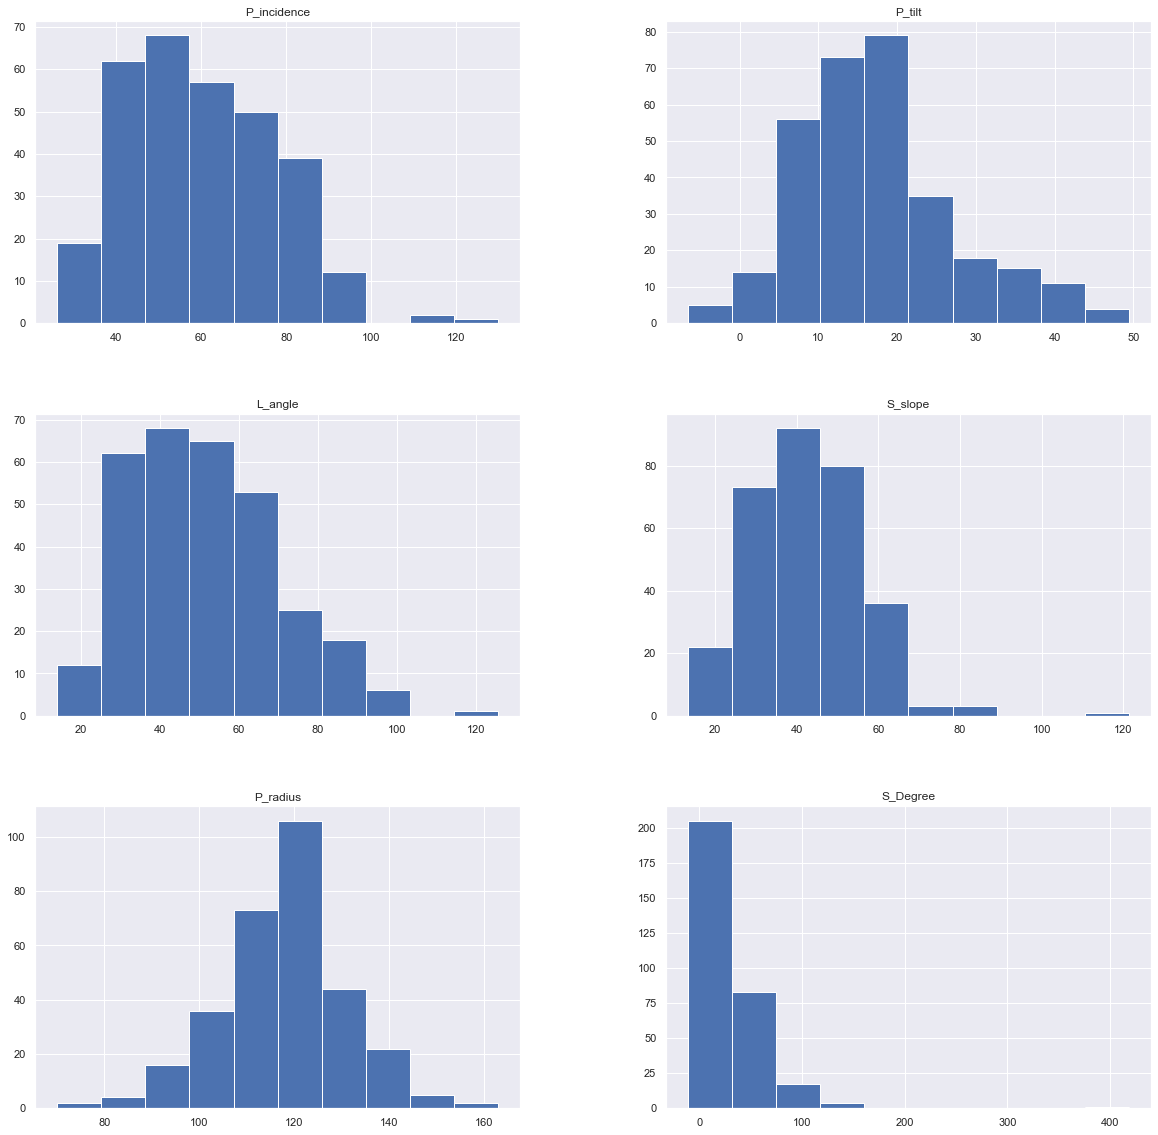

In [ ]:
p = final_df.hist(figsize = (20,20))

In [ ]:
# using dictionary to convert specific columns
convert_dict = {
                'P_incidence': float
               }
  
final_df = final_df.astype(convert_dict)
print(final_df.dtypes)

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64


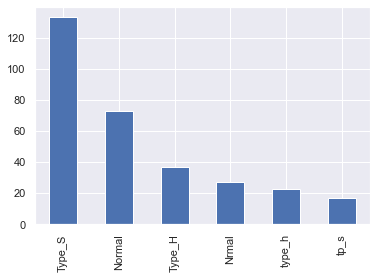

In [ ]:
## checking the balance of the data by plotting the count of outcomes by their value
print(final_df.Class.value_counts())
p=final_df.Class.value_counts().plot(kind="bar")

In [ ]:
final_df.Class.replace(['Nrmal', 'type_h','tp_s'], ['Normal', 'Type_H','Type_S'], inplace=True)


Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64


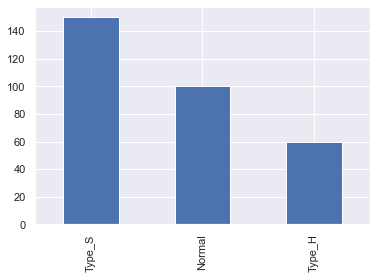

In [ ]:
## checking the balance of the data by plotting the count of outcomes by their value
print(final_df.Class.value_counts())
p=final_df.Class.value_counts().plot(kind="bar")

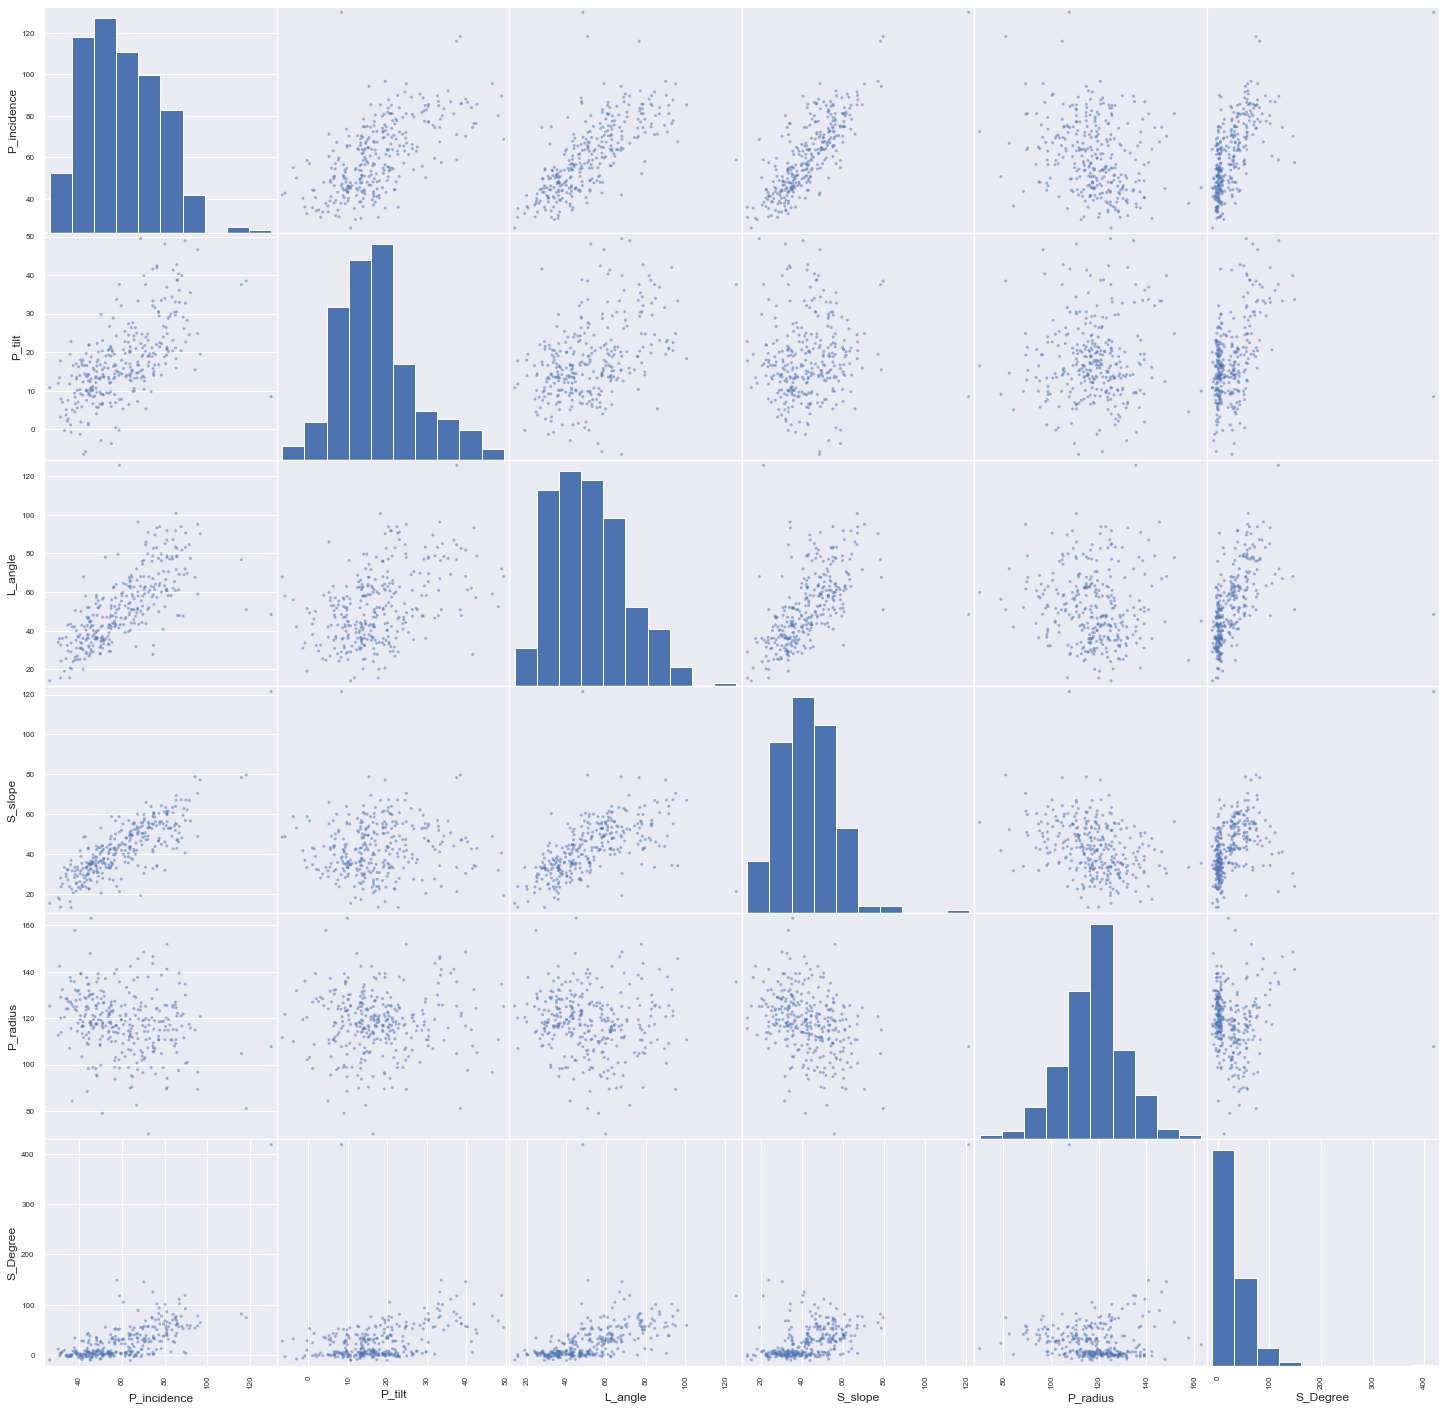

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(final_df,figsize=(25, 25))

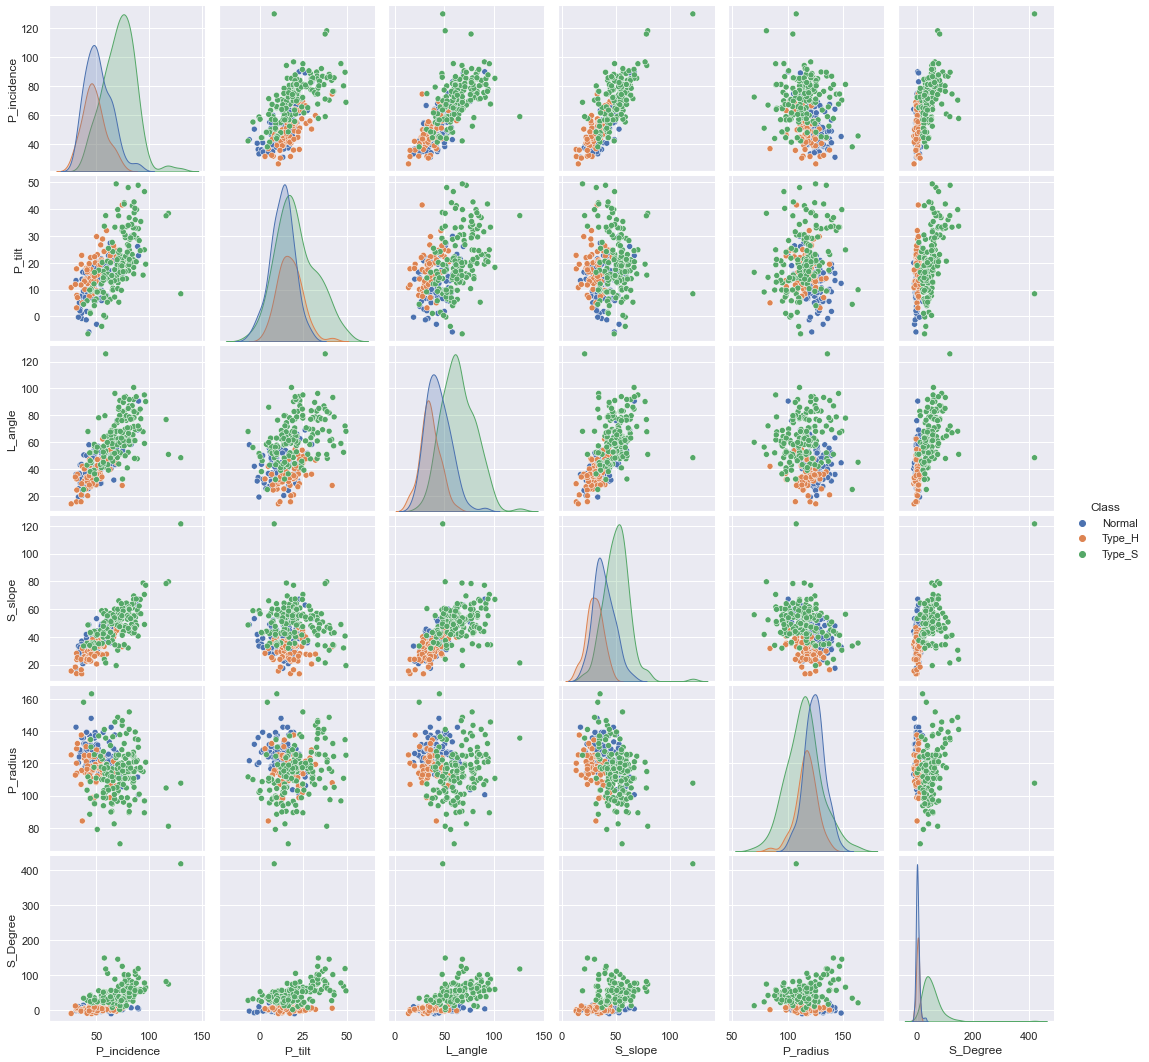

In [ ]:
p=sns.pairplot(final_df, hue = 'Class')


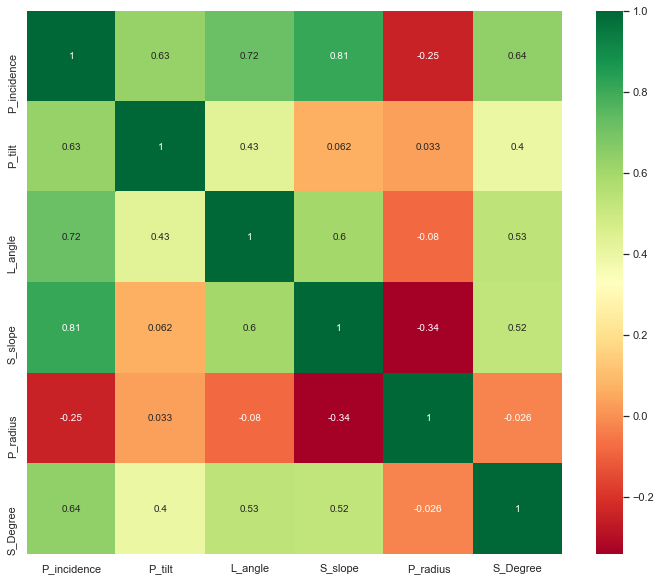

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(final_df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
correlation = final_df.corr()
correlation['Class'].sort_values(ascending=False)

Class          1.000000
S_Degree       0.608705
P_incidence    0.537638
L_angle        0.525466
S_slope        0.430734
P_tilt         0.348231
P_radius      -0.304099
Name: Class, dtype: float64

# 4. Data pre-processing:
• Segregate predictors vs target attributes

• Perform normalisation or scaling if required.

• Check for target balancing. Add your comments.

• Perform train-test split.

In [ ]:
final_df.Class.replace(['Normal', 'Type_H','Type_S'], [0,1,2], inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(final_df.drop(["Class"],axis = 1),),
        columns=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'])

In [ ]:
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650


In [ ]:
X.shape

(310, 6)

In [ ]:
#X = final_df.drop("Outcome",axis = 1)
y = final_df.Class

In [ ]:
y.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
print("X traing size",X_train.shape)
print("X test size",X_test.shape)
print("y training size",y_train.shape)
print("y test size",y_test.shape)

X traing size (206, 6)
X test size (104, 6)
y training size (206,)
y test size (104,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.8076923076923 % and k = [1]


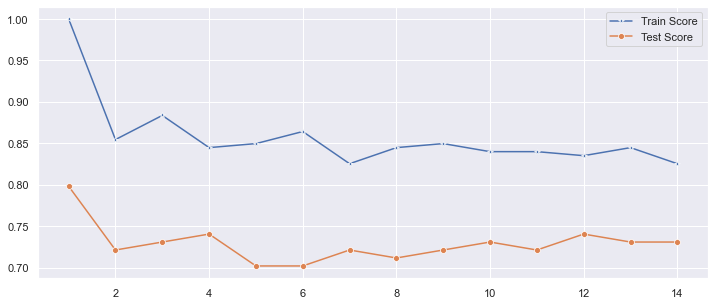

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(15)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7403846153846154

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test, y_pred)

0.7403846153846154

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,26,5,3,34
1,9,11,0,20
2,9,1,40,50
All,44,17,43,104


In [ ]:
y_pred

array([2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

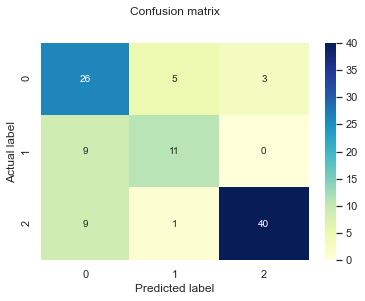

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67        34
           1       0.65      0.55      0.59        20
           2       0.93      0.80      0.86        50

    accuracy                           0.74       104
   macro avg       0.72      0.70      0.71       104
weighted avg       0.76      0.74      0.75       104



In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7967741935483872
Best Parameters: {'n_neighbors': 9}


In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.76190476 0.66666667 0.76190476 0.85714286 0.85714286 0.71428571
 0.9        0.8        0.8        0.85      ]


In [ ]:
# compute Average cross-validation score
'''Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.
If we look at all the 10 scores produced by the 10-fold cross-validation, 
we can also conclude that there is a relatively high variance in the accuracy between folds, 
ranging from 90% accuracy to 66.66% accuracy. So, we can conclude that the model is very dependent 
on the particular folds used for training, but it also be the consequence of the small size of the dataset.'''

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7969
